# Public Utilities
- The case gives corporate data on 22 U.S. public utilities
from different states.

- We are interested in forming groups of similar utilities.
The records to be clustered are the utilities, and the
clustering will be based on the eight measurements on
each utility.

- The clustering results would be useful to predict the cost
impact of deregulation.

  - To do the requisite analysis, economists would need to build a detailed
cost model of the various utilities.

  - It would save a considerable amount of time and effort if we could
cluster similar types of utilities and build detailed cost models for just
one "typical" utility in each cluster and then scale up from these models
to estimate results for all utilities.


# Variables
Fixed = fixed-charge covering ratio
(income/debt);

RoR = rate of return on capital;

Cost = cost per kilowatt capacity in place;

Load = annual load factor;

Demand = peak kilowatt hour demand growth
last year;

Sales = sales (kilowatt hour use per year);

Nuclear = percent nuclear;

Fuel total fuel costs (cents per kilowatt hour)

# Preliminary Study
For simplicity, let’s focus in two variables
(Sales and Fuel Cost) first since it is easier
to visualize the relationship and get a
basic understanding
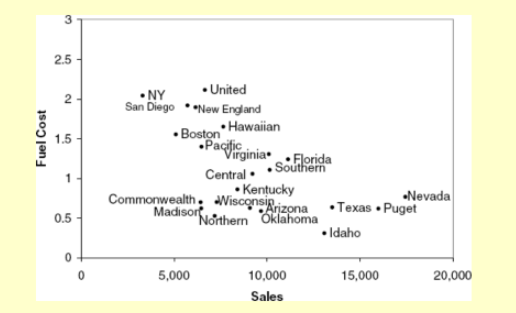


# Cluster Suggestion
- At first glance, there appear to be two or three
clusters of utilities:

  - one with utilities that have high fuel costs,

  - a second with utilities that have lower fuel costs and
relatively low sales,

  - and a third with utilities with low fuel costs but high
sales.

- We can therefore think of cluster analysis as a
more formal algorithm that measures the
distance between records, and according to
these distances (here, two-dimensional
distances) forms clusters.

# Utilities

In [ ]:
# Import the data
import pandas as pd

# Graph plotting
import matplotlib.pyplot as plt
%matplotlib inline

# import the function StandardScaler
from sklearn.preprocessing import StandardScaler

# hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster #package for drawing the dendrogram and define linkage
from sklearn.cluster import AgglomerativeClustering

# Kmeans clustering
from sklearn.cluster import KMeans

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

#### Dendrogram(X,method,metric): return the dendrogram
- input:
    - X: Data
    - method: Linkage method 
        - available method: single, complete, average, weighted, centroid, median, ward 

    - metric: Distance function (e.g. Euclidean)
- output:
    - A dendrogram

In [ ]:
def Dendrogram(X, method, metric):
    plt.figure(figsize=(10, 7))  
    Z = linkage(X, method=method, metric=metric)
    dendrogram(Z, labels = range(1, len(X) + 1))
    plt.title("Dendogram") 
    plt.xlabel('Company ID')
    plt.ylabel('distiance')
    plt.show()

#### ElbowPlot(X, k_min, k_max): return elbow plot
- input:
    - X: Data
    - k_min: minimum value of k
    - k_max: maximum value of k
- output:
    - An elbow plot

In [ ]:
def ElbowPlot(X, k_min, k_max):
    wss = [ ]
    for i in range(k_min, k_max+1):
        kmeans = KMeans(n_clusters = i, random_state = 2600)
        kmeans.fit(X)
        wss.append(kmeans.inertia_)
    plt.figure(figsize=(10,10))
    plt.plot(range(k_min, k_max+1), wss, '-o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of cluster k')
    plt.ylabel('Within group Sum of Square')
    plt.show()

In [ ]:
url = 'https://drive.google.com/file/d/1YQ5WCGYxpDE9RSCFeQF6IrTDa3bi3NyN/view?usp=sharing'
data_path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [ ]:
data = pd.read_csv(data_path)
data.index=data['Label']
data.head()

,Company,State,Label,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Label,,,,,,,,,,,
Arizona,Arizona Public Service,Arizona,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
Boston,Boston Edison Co.,Massachusetts,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
Central,Central Louisiana Co.,Louisiana,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
Commonwealth,Commonwealth Edison Co.,Illinois,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
NY,Consolidated Edison Co. (NY),New York,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


### Standardizing the variables

In [ ]:
# standardization of the continuous variables
X = data.iloc[:, 3:]
# standardization
X_scaled = StandardScaler().fit_transform(X)
# convet X_scaled to DataFrame; X_scaled generated from StandardScaler is a numpy array 
X_d = pd.DataFrame(X_scaled, columns=X.columns, index= X.index)

In [ ]:
X_d.head()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Label,,,,,,,,
Arizona,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
Central,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
Commonwealth,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470


## Hierarchical clustering

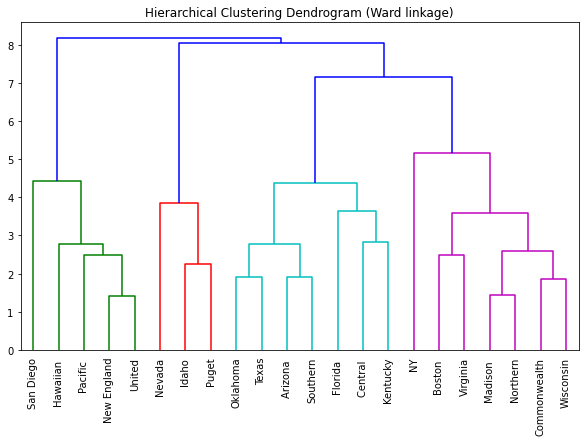

In [ ]:
#Dendrogram(X_d, method = 'ward', metric = 'euclidean', labels=X.index)
fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
Z = linkage(X_d, method = 'ward', metric = 'euclidean')
dendrogram(Z, labels=X_d.index,leaf_rotation=90.)
plt.show()


## 4 Clusters

In [ ]:
memb = fcluster(linkage(X_d, 'ward'), 4, criterion='maxclust')
memb = pd.Series(memb, index=X_d.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Hawaiian , New England, Pacific , San Diego, United
2 :  Idaho, Nevada, Puget
3 :  Arizona , Central , Florida , Kentucky, Oklahoma, Southern, Texas
4 :  Boston , Commonwealth, NY, Madison , Northern, Wisconsin, Virginia


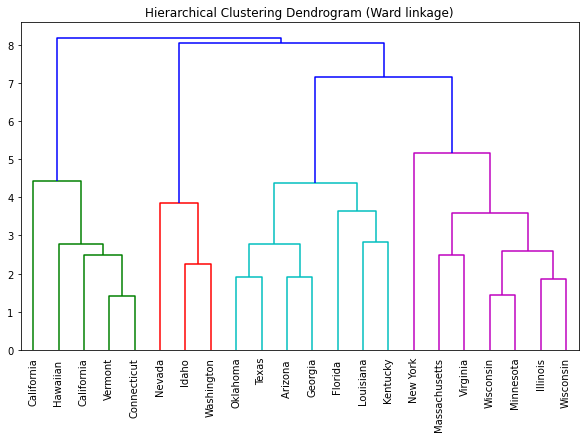

In [ ]:
#Dendrogram(X_d, method = 'ward', metric = 'euclidean', labels=X.index)
fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
Z = linkage(X_d, method = 'ward', metric = 'euclidean')
dendrogram(Z, labels=data['State'],leaf_rotation=90.)
plt.show()

In [ ]:
#By state
memb = fcluster(linkage(X_d, 'ward'), 4, criterion='maxclust')
memb = pd.Series(memb, index=X_d.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(data.loc[item.index,'State']))

1 :  Hawaiian , Vermont, California, California, Connecticut
2 :  Idaho, Nevada, Washington
3 :  Arizona , Louisiana, Florida , Kentucky, Oklahoma, Georgia, Texas
4 :  Massachusetts, Illinois, New York, Wisconsin, Minnesota, Wisconsin, Virginia


In [ ]:
#By company
memb = fcluster(linkage(X_d, 'ward'), 4, criterion='maxclust')
memb = pd.Series(memb, index=X_d.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Hawaiian , New England, Pacific , San Diego, United
2 :  Idaho, Nevada, Puget
3 :  Arizona , Central , Florida , Kentucky, Oklahoma, Southern, Texas
4 :  Boston , Commonwealth, NY, Madison , Northern, Wisconsin, Virginia
